# Enhancing Bank's Personal Loan Approaches

## Table of Contents

- Introduction
- Data Loading and Initial Exploration
- Data Visualization
- Data Preprocessing
- Model Building
- Model Training and Evaluation
- Conclusion

## Introduction

Our initiative aims to help a bank identify customers who are most likely to be a good fit for personal loans. While the bank has traditionally focused on savings and deposits, it is now looking to expand its offerings and diversify its revenue streams by introducing personal loans. This project is designed to identify customers more likely to be interested in personal loans, which is essential given the bank's past track record, where only 9% of approached customers showed interest in personal loans. Our program is a targeted marketing solution that directs personal loan offers to individuals more likely to accept them. By aligning our technological solution with the bank's strategic goals, we aim to streamline the identification process of prospective loan customers, catalyzing business growth and enhancing the suite of services available to customers. Our goal is to foster an environment of satisfaction and mutual benefit.

## Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import joblib
import warnings
warnings.filterwarnings('ignore')

2024-11-22 19:03:19.774360: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 19:03:19.778352: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 19:03:19.789934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 19:03:19.808601: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 19:03:19.814152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 19:03:19.828564: I tensorflow/core/platform/cpu_feature_gu

In [2]:
bank_df = pd.read_csv('universal_bank.csv')
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The meaning of each column in the dataset can be inferred as follows:

- `ID`: A unique identifier for each individual in the dataset. This is typically used to differentiate between entries and is not used for analysis.
- `Age`: The age of the individual in years. It is a key demographic attribute that can influence financial behaviour and product suitability.
- `Experience`: The number of years the individual has been working or has been in their current profession. Negative values may indicate data errors or require clarification.
- `Income`: The individual's annual income in thousands of dollars. This is a crucial indicator of economic status and purchasing power.
- `ZIP Code`: The postal code of the individual's primary residence. This can be used to geographically segment the data or infer regional economic factors.
- `Family`: The size of the individual's family, often indicating the number of dependents. This can affect financial needs and priorities.
- `CCAvg`: The average spending on credit cards per month, in thousands of dollars. This reflects credit usage and spending behaviour.
- `Education`: An ordinal variable indicating the level of education the individual has completed. This is typically coded with numbers representing different levels, such as 1 for undergraduate, 2 for graduate, and 3 for advanced/professional degrees.
- `Mortgage`: The value of the individual's home mortgage, if any, in thousands of dollars. A higher mortgage value might indicate higher property value or debt levels.
- `Personal Loan`: A binary indicator (0 or 1) showing whether the individual has accepted a personal loan offered by the bank in a previous campaign. This reflects the individual's propensity to take loans.
- `Securities Account`: A binary indicator (0 or 1) showing whether the individual has a securities account with the bank. This can indicate investment behavior.
- `CD Account`: A binary indicator (0 or 1) showing whether the individual has a certificate of deposit (CD) account with the bank, reflecting another type of investment behavior.
- `Online`: A binary indicator (0 or 1) showing whether the individual uses online banking facilities. This reflects the adoption of digital banking solutions.
- `CreditCard`: A binary indicator (0 or 1) showing whether the individual uses a credit card issued by the bank. This can indicate credit usage and trust in the bank's credit products.

Each of these columns provides insights into the financial and demographic characteristics of the individuals in the dataset, allowing for detailed analysis and modelling of financial behaviours.

The DataFrame summary reveals several key insights about the data it encompasses:

- **Complete Data**: The dataset consists of 5,000 entries with no missing values across all 14 columns, indicating a well-maintained and complete dataset, which is crucial for accurate data analysis and model training.
- **Diverse Attributes**: The columns cover a broad range of attributes, including demographic information (`Age`, `ZIP Code`, `Family`), financial behaviour and products (`Income`, `CCAvg`, `Mortgage`, `Personal Loan`, `Securities Account`, `CD Account`, `CreditCard`), and service usage (`Online`), providing a comprehensive overview of an individual's financial standing and behaviours.
- **Data Types and Structure**: The dataset primarily contains integer values (`int64`) with one column of floating-point numbers (`float64`), which is the average monthly credit card spending (`CCAvg`). This structure indicates that most of the data is numeric and categorical in nature, suitable for various types of analysis, including regression, classification, and clustering.

In [6]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The summary statistics of the dataset provide key insights into the financial and demographic profiles of 5,000 individuals, highlighting several important aspects:

- **Demographics**: The average age of the participants is around 45 years, with experiences ranging on average from -3 to 43 years. The presence of negative experience values suggests potential data entry errors or a special encoding that needs clarification.
- **Financial Behavior**:
  - **Income**: The participants have a wide range of annual incomes, averaging at approximately 73.77K, with a significant standard deviation, indicating considerable income disparity within the sample.
  - **Credit Card Spending**: On average, individuals spend about 1.94K monthly on their credit cards, with spending ranging up to 10K, suggesting varied credit card usage among the participants.
  - **Mortgage**: While the average mortgage value is around 56.5K, the distribution is heavily right-skewed, with 75% of individuals having mortgages of 101K or less, yet some have mortgages as high as 635K.
- **Product Usage**:
    - A small percentage of the population has taken a personal loan (9.6%) or has securities (10.44%) and CD accounts (6.04%), indicating specific product preferences or needs.
    - The adoption of online banking services is relatively high, with nearly 60% of the participants using such services, while about 29.4% possess a credit card issued by the bank.
- **Educational Background**: The dataset indicates a varied educational background among participants, with levels ranging from 1 to 3, suggesting a mix of undergraduate, graduate, and advanced degrees.

## Data Visualization

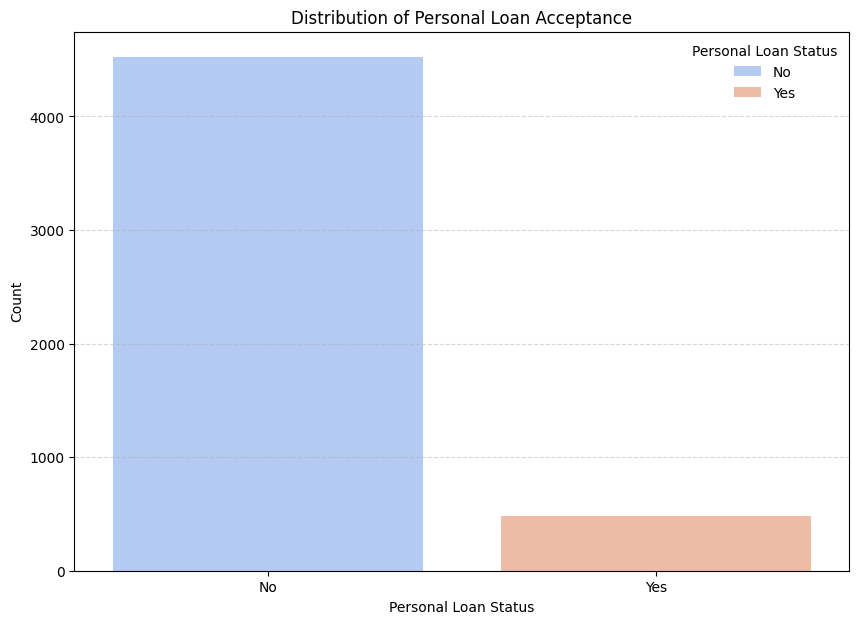

In [7]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Personal Loan', data=bank_df, hue='Personal Loan', palette='coolwarm', dodge=False)
plt.title('Distribution of Personal Loan Acceptance')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Personal Loan Status', labels=['No', 'Yes'], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.5);

The bar graph highlights the stark imbalance in personal loan acceptance among the bank's customers, with the overwhelming majority declining offers (blue) and only a small fraction accepting them (orange). This aligns with the bank's historical trend, where just 9% of customers showed interest in personal loans. The visualization emphasizes the need for a targeted approach to identify customers more likely to accept personal loan offers. By leveraging predictive models, the bank can focus on this smaller, receptive segment, improving marketing efficiency and driving business growth.

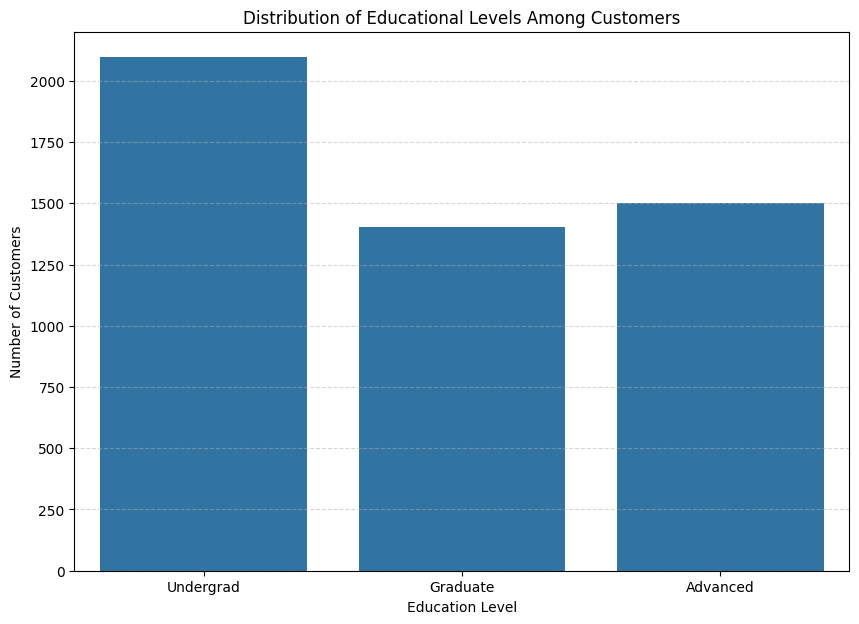

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Education', data=bank_df)
plt.title('Distribution of Educational Levels Among Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1, 2], labels=['Undergrad', 'Graduate', 'Advanced'])
plt.grid(axis='y', linestyle='--', alpha=0.5);

The bar graph illustrates the distribution of educational levels among the bank's customers, with the largest group being those with an undergraduate education (over 2,000 customers), followed by graduate and advanced education levels, each with approximately 1,500 customers. This diverse distribution highlights the potential influence of educational attainment on financial behaviours and preferences. Understanding these segments allows the bank to tailor personal loan marketing strategies, ensuring that messaging and product offerings align with each group's specific needs and characteristics.

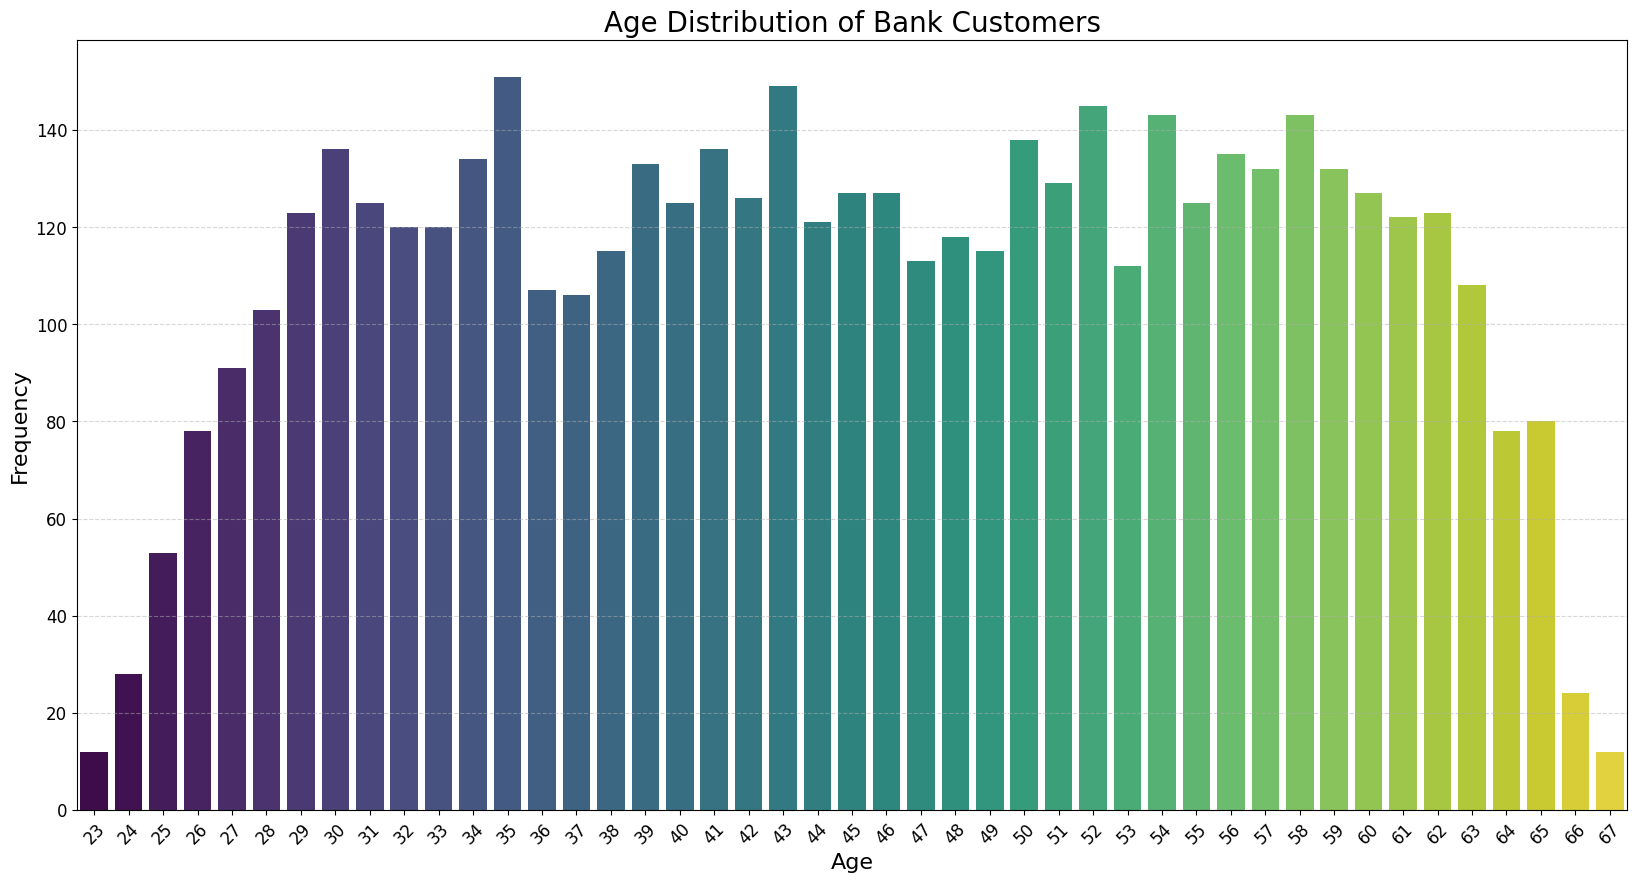

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', data=bank_df, hue='Age', palette='viridis', dodge=False)
plt.title('Age Distribution of Bank Customers', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend([],[], frameon=False);

The histogram depicts the age distribution of the bank's customers, showing a wide range from 23 to 67 years old. The distribution is relatively uniform across most age groups, with a slight peak around the late 20s and early 30s and a gradual decline in customers after 60. This spread highlights the bank's diverse customer base age, which is critical for tailoring marketing strategies. Younger customers may be more inclined toward loans for significant life purchases, while older customers might have different financial priorities, making age an essential factor in personalizing loan offers.

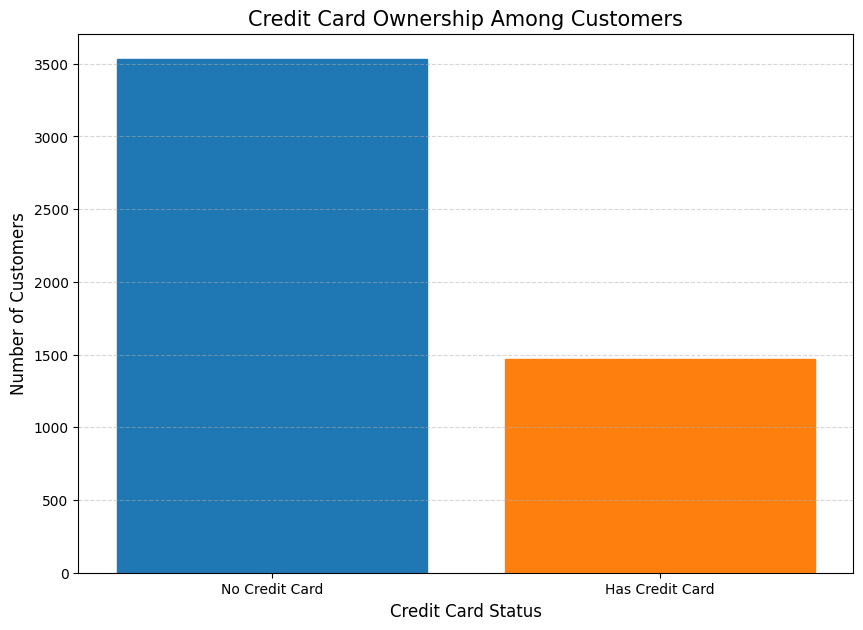

In [10]:
plt.figure(figsize=(10, 7))
countplot = sns.countplot(x='CreditCard', data=bank_df)
countplot.set_title('Credit Card Ownership Among Customers', fontsize=15)
countplot.set_xlabel('Credit Card Status', fontsize=12)
countplot.set_ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Credit Card', 'Has Credit Card'])
colors = ['#1f77b4', '#ff7f0e']
for i, bar in enumerate(countplot.patches):
    bar.set_color(colors[i % len(colors)])
plt.grid(axis='y', linestyle='--', alpha=0.5);

The bar graph shows the distribution of credit card ownership among the bank's customers. Most customers (over 3,500) do not own a credit card, while a smaller proportion (around 1,500) are credit card holders. This imbalance suggests that a large customer base might not have established credit histories, which could influence their eligibility and interest in personal loans. Understanding this distribution is vital for designing loan marketing strategies, as customers with credit cards may be more familiar with credit-based financial products and, therefore, more likely to accept personal loan offers.

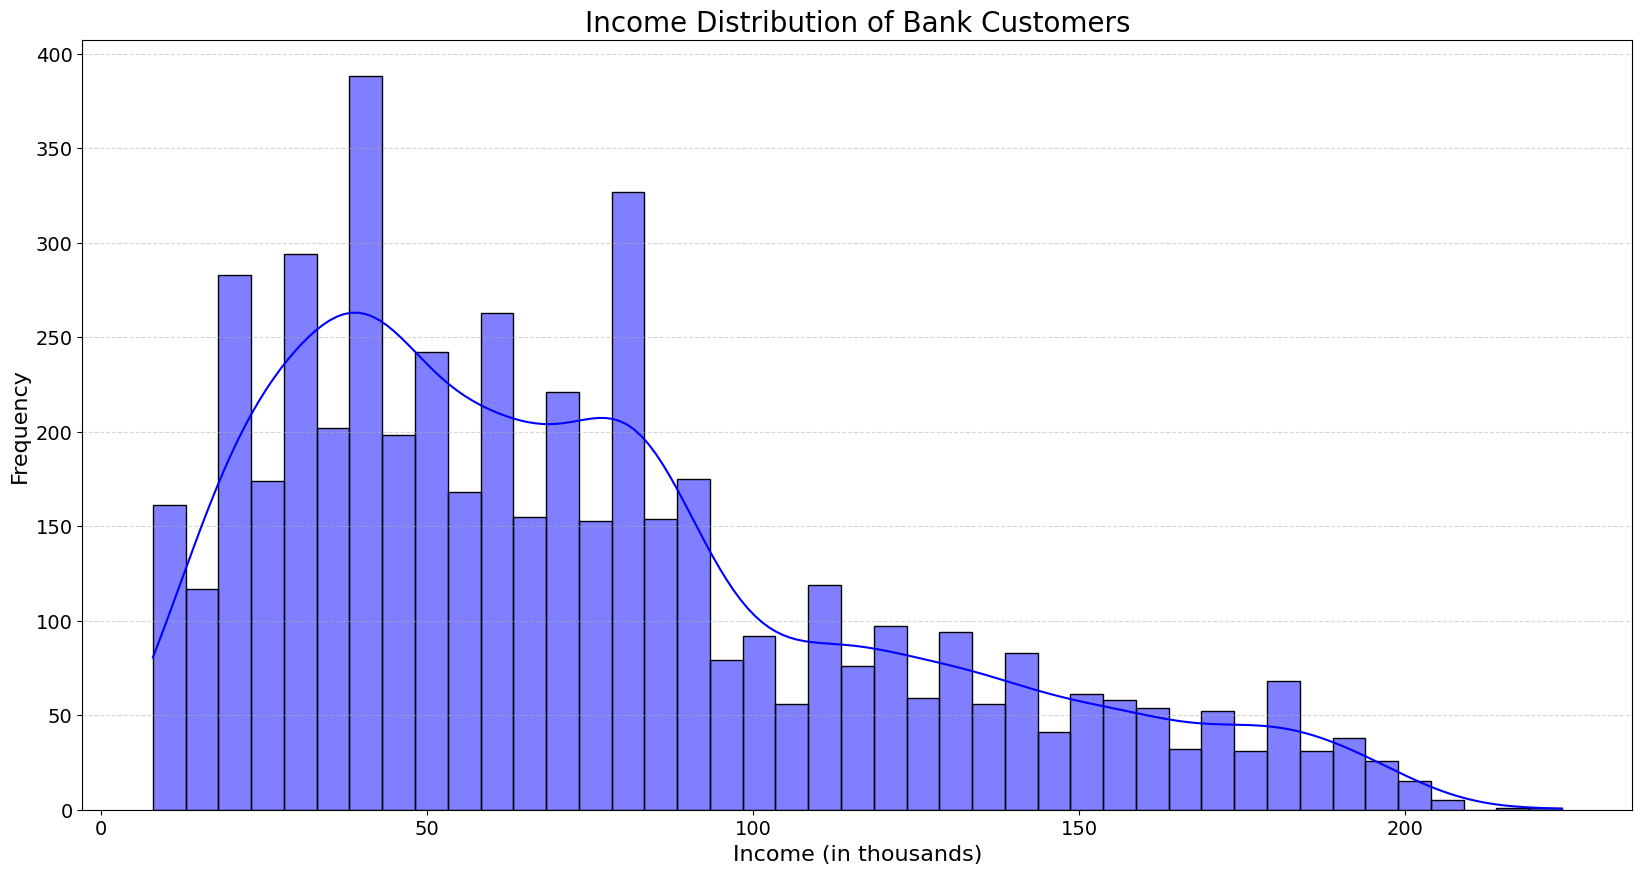

In [11]:
plt.figure(figsize=(20, 10))
sns.histplot(bank_df['Income'], kde=True, color='blue', binwidth=5)
plt.title('Income Distribution of Bank Customers', fontsize=20)
plt.xlabel('Income (in thousands)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5);

The histogram illustrates the income distribution of the bank's customers, with income measured in thousands. The data is right-skewed, with most customers earning below 100,000 and the most frequent income level clustering around 50,000. As income increases beyond this point, the frequency gradually declines, with only a small fraction earning above 150,000. This distribution highlights the diverse financial backgrounds of the customer base, emphasizing the importance of segmenting loan offerings. Customers in lower income brackets may require different loan structures compared to higher-income customers, aligning products with financial capacity and preferences.

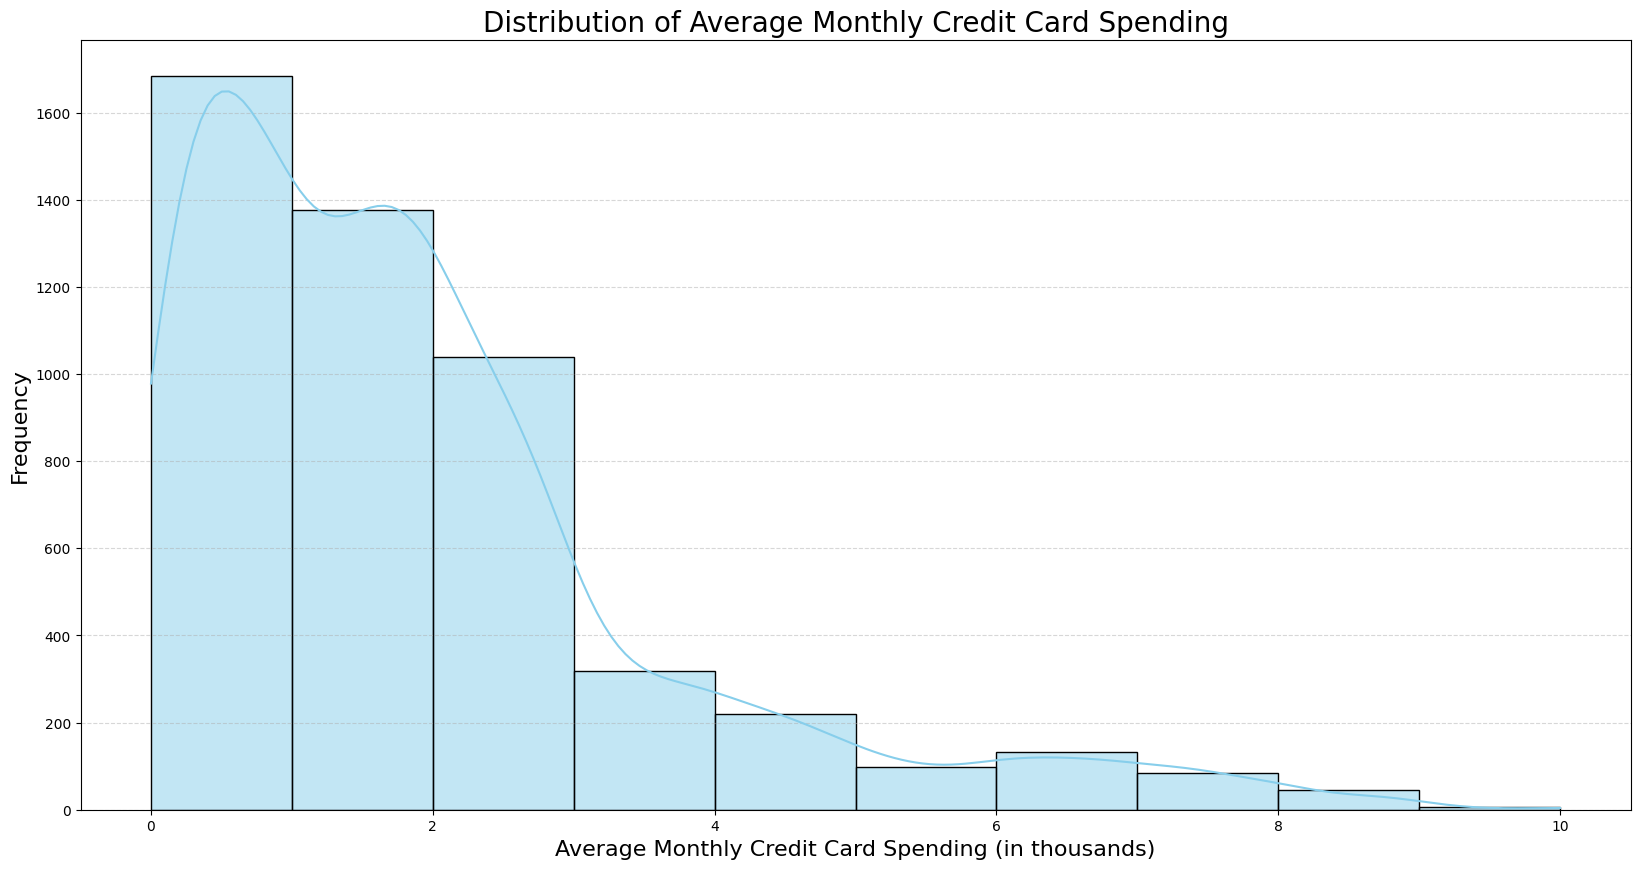

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(bank_df['CCAvg'], kde=True, color='skyblue', binwidth=1)
plt.title('Distribution of Average Monthly Credit Card Spending', fontsize=20)
plt.xlabel('Average Monthly Credit Card Spending (in thousands)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5);

The histogram shows the average monthly credit card spending distribution among the bank's customers, measured in thousands. The data is heavily right-skewed, with most customers spending less than two thousand monthly and spending declines steadily as the amount increases, with very few customers spending above six thousand. This distribution suggests that most customers maintain modest spending habits, which could impact their likelihood of considering personal loans. Understanding this spending behaviour can help the bank align its loan products with customer financial activity, focusing on affordability and spending patterns.

In [13]:
personal_loans = bank_df[bank_df['Personal Loan'] == 1]
no_personal_loans = bank_df[bank_df['Personal Loan'] == 0]

In [14]:
personal_loans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [15]:
personal_loans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [16]:
no_personal_loans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [17]:
no_personal_loans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


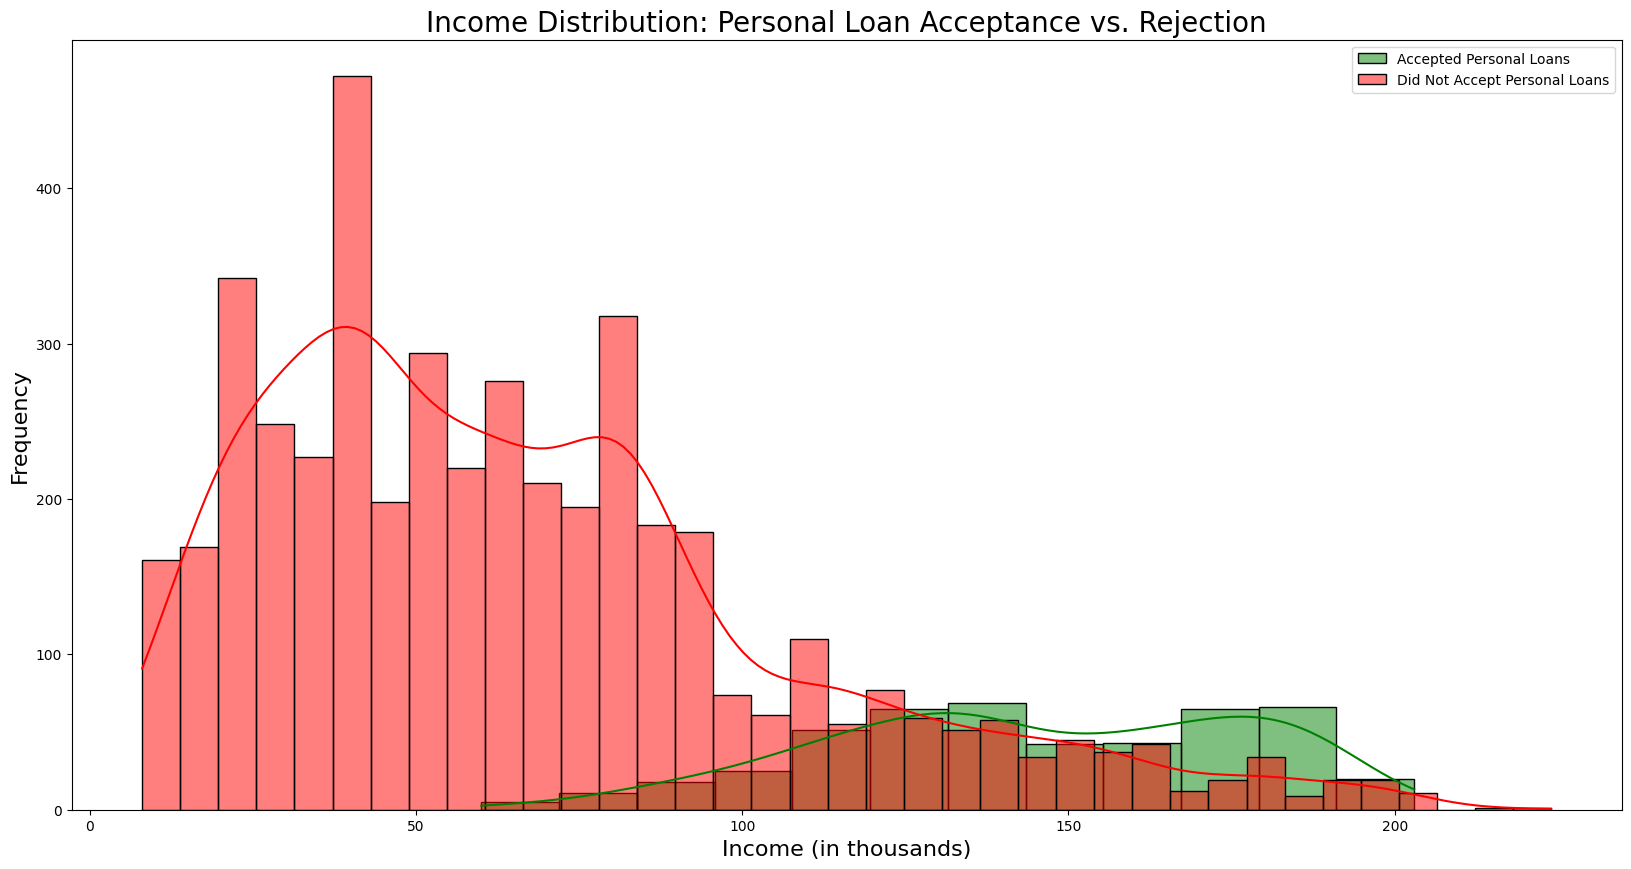

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(personal_loans['Income'], color='green', kde=True, label='Accepted Personal Loans', alpha=0.5)
sns.histplot(no_personal_loans['Income'], color='red', kde=True, label='Did Not Accept Personal Loans', alpha=0.5)
plt.title('Income Distribution: Personal Loan Acceptance vs. Rejection', fontsize=20)
plt.xlabel('Income (in thousands)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend();

The histogram compares the income distribution of customers who accepted personal loans (green) versus those who did not (red), measured in thousands. Most customers who did not take loans have incomes below 100,000, with the highest frequency clustering around 50,000. In contrast, customers who accepted personal loans tend to have higher incomes, most falling between 100,000 and 200,000. This pattern suggests that higher-income customers are more likely to take personal loans, highlighting the importance of targeting this demographic for marketing. The distinction between the two groups underscores the role of income as a critical factor in loan acceptance behaviour

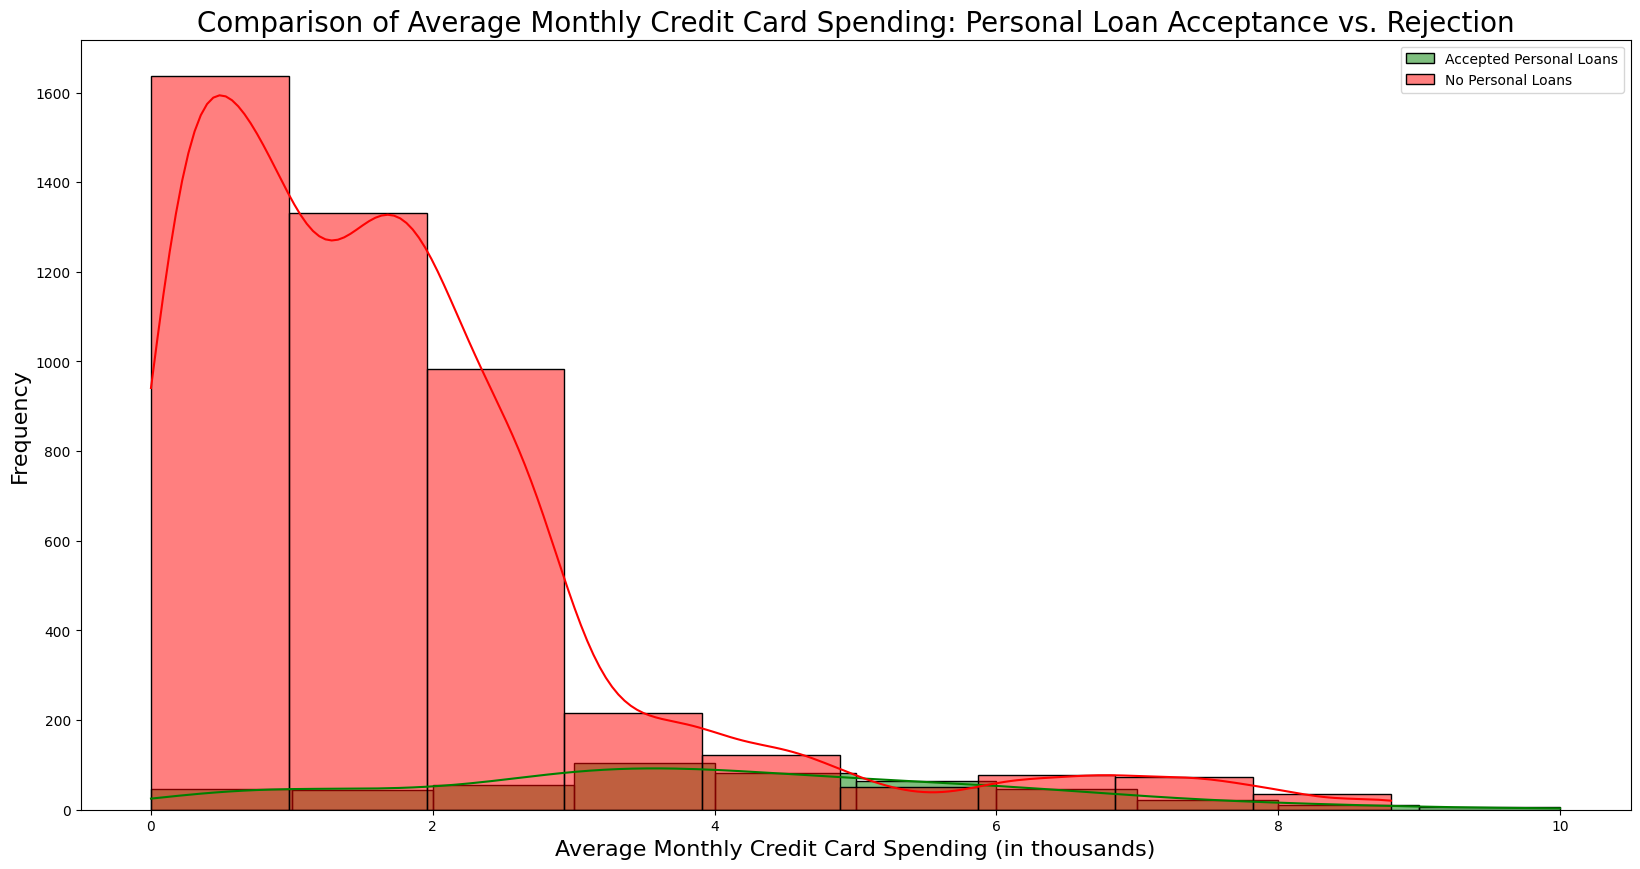

In [19]:
plt.figure(figsize=(20, 10))
sns.histplot(personal_loans['CCAvg'], color='green', kde=True, label='Accepted Personal Loans', alpha=0.5, binwidth=1)
sns.histplot(no_personal_loans['CCAvg'], color='red', kde=True, label='No Personal Loans', alpha=0.5, binwidth=1)
plt.title('Comparison of Average Monthly Credit Card Spending: Personal Loan Acceptance vs. Rejection', fontsize=20)
plt.xlabel('Average Monthly Credit Card Spending (in thousands)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend();

The histogram compares the average monthly credit card spending of customers who accepted personal loans (green) versus those who did not (red), measured in thousands. Most customers who did not take loans have low credit card spending, primarily under two thousand, sharply declining as spending increases. Conversely, customers who accepted loans are concentrated in higher spending ranges, with a noticeable representation between two thousand and six thousand. This trend suggests that higher credit card spending may indicate a greater likelihood of accepting personal loans, reflecting financial activity levels as a potential predictor of loan acceptance.

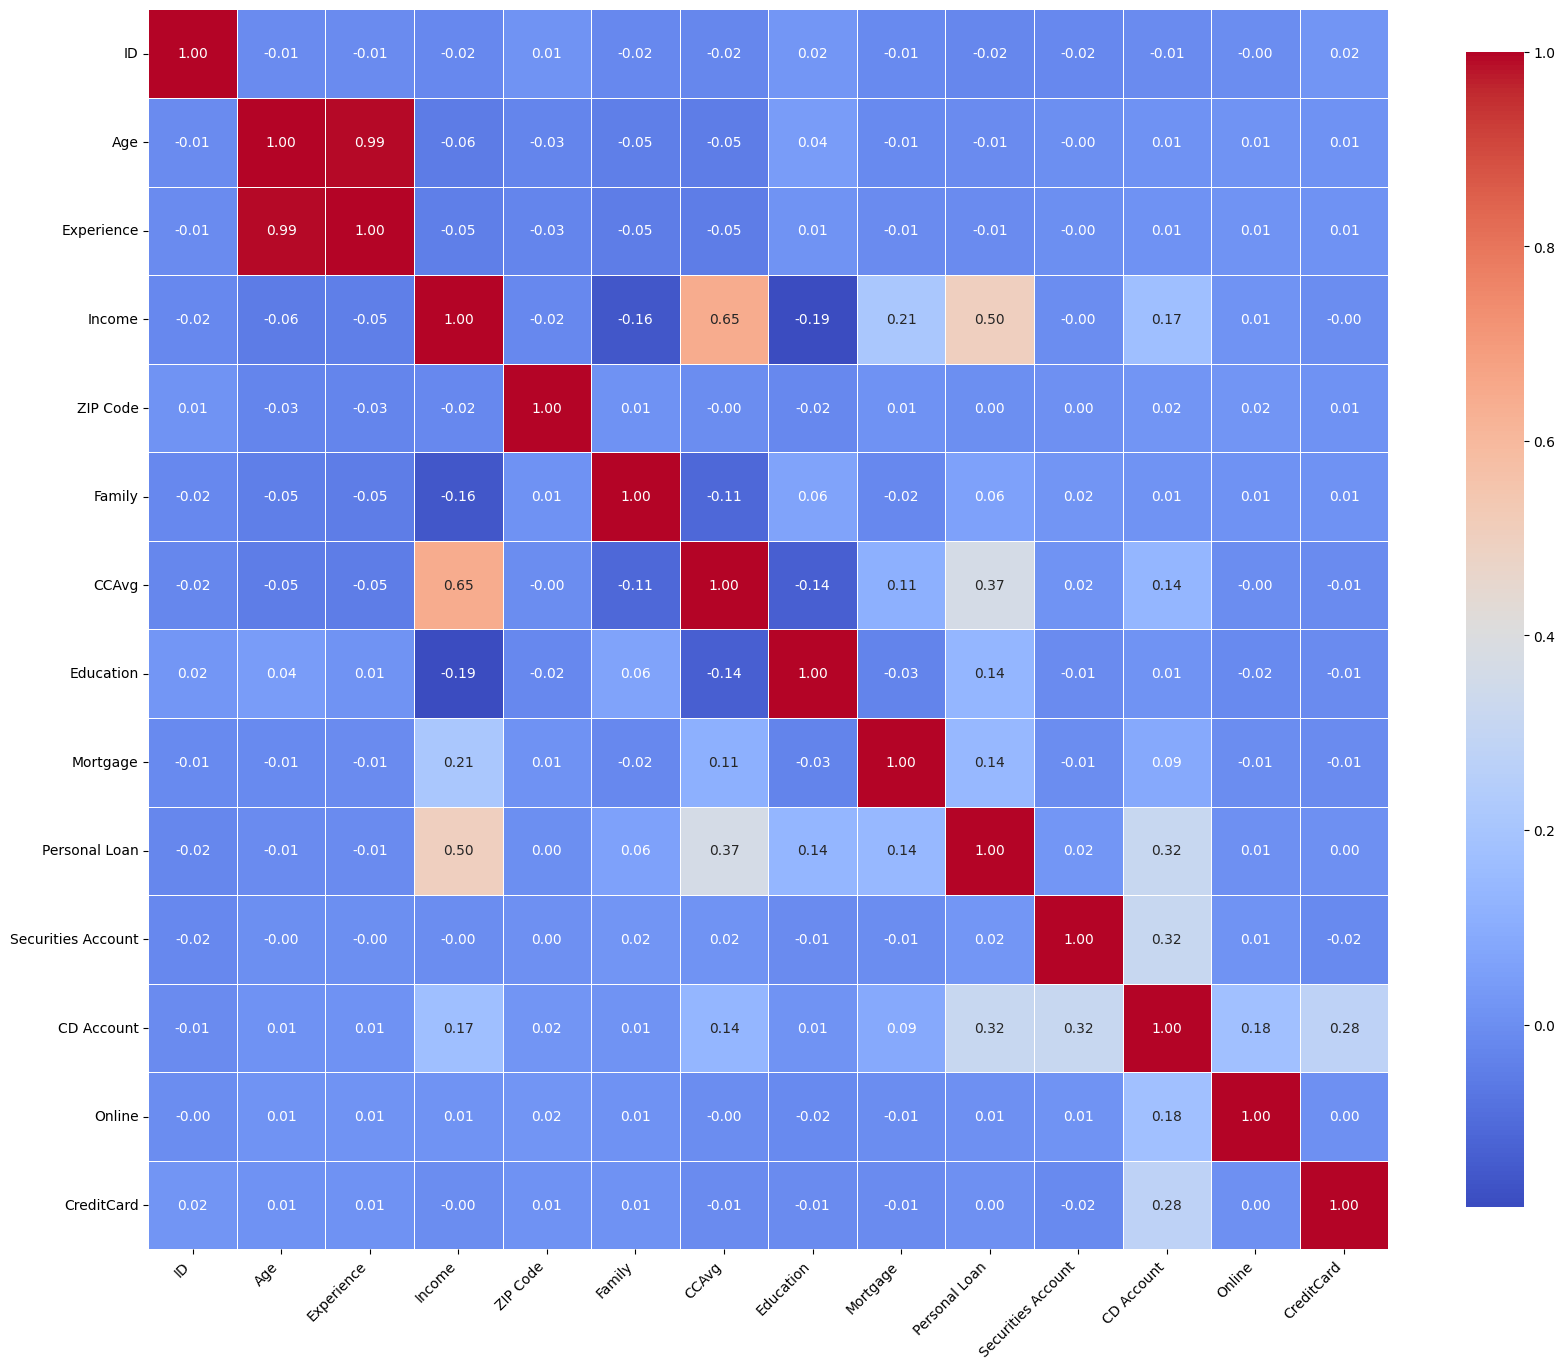

In [20]:
plt.figure(figsize=(20, 20))
cm = bank_df.corr()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5, cbar_kws={'shrink': .75})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10);

Analyzing the bank dataset's correlation matrix reveals:

- **Age** and **Experience** are highly correlated, reflecting their inherent relationship.
- **Income** and **Credit Card Spending** show a strong positive correlation, indicating higher earners spend more on credit.
- **Personal Loan Acceptance** correlates positively with income, credit card spending, and having a CD account, suggesting those with more financial resources or spending are likelier to take loans.
- **Investment Products**: Owning CD and securities accounts are moderately correlated, indicating customers prefer diverse investment options.
- **Online Banking** and **Credit Card Usage** exhibit negligible correlation, suggesting independent customer decisions regarding these services.

## Data Preprocessing

In [21]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [22]:
X = bank_df.drop(columns = ['ID', 'ZIP Code', 'Personal Loan'])
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [23]:
y = bank_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [24]:
y = to_categorical(y)
y
# After conversion, y is now a binary class matrix. If the original y had a shape (n,) where n is the number of samples,
# the new y will have a shape (n, k), where k is the number of classes.
# Each row of this matrix corresponds to a sample in the original dataset, and each column corresponds to a class.
# For each row, the element in the column corresponding to the class to which the sample belongs is set to 1,
# and all other elements are set to 0.

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

This representation is particularly useful for classification models in deep learning, as it allows the model to output probabilities of each class for a given sample through the softmax activation function in the output layer, and to compare these probabilities directly with the one-hot encoded true labels during training.

In [25]:
standard_scaler_X = StandardScaler()
X = standard_scaler_X.fit_transform(X)

# Initial train-test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print(f'X_temp shape: {X_temp.shape}, X_test shape: {X_test.shape}, y_temp shape: {y_temp.shape}, y_test shape: {y_test.shape}')

# Splitting the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.10, random_state=42)
print(f'X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, y_train shape: {y_train.shape}, y_val shape: {y_val.shape}')

X_temp shape: (4500, 11), X_test shape: (500, 11), y_temp shape: (4500, 2), y_test shape: (500, 2)
X_train shape: (4050, 11), X_val shape: (450, 11), y_train shape: (4050, 2), y_val shape: (450, 2)


## Model Building

In [26]:
def create_model(learning_rate=0.001, dropout_rate=0.0, n_neurons=100, optimizer='adam'):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_neurons*2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_neurons*2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

best_accuracy = 0
best_params = {'learning_rate': 0, 'dropout_rate': 0, 'n_neurons': 0, 'optimizer': ''}

for lr in [0.001, 0.01]:
    for dr in [0.2, 0.5]:
        for n_neurons in [50, 100, 250]:
            for optimizer in ['adam', 'sgd']:
                model = create_model(learning_rate=lr, dropout_rate=dr, n_neurons=n_neurons, optimizer=optimizer)
                history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=10, verbose=0)
                val_accuracy = np.max(history.history['val_accuracy'])
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_params = {'learning_rate': lr, 'dropout_rate': dr, 'n_neurons': n_neurons, 'optimizer': optimizer}

print(f'Best Params: {best_params}, Best Accuracy: {best_accuracy}')

Best Params: {'learning_rate': 0.001, 'dropout_rate': 0.5, 'n_neurons': 250, 'optimizer': 'adam'}, Best Accuracy: 0.9911110997200012


## Model Training and Evaluation

In [27]:
final_training_history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

final_model = create_model(**best_params)
history = final_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=10, verbose=1)

final_training_history['loss'] = history.history['loss']
final_training_history['val_loss'] = history.history['val_loss']
final_training_history['accuracy'] = history.history['accuracy']
final_training_history['val_accuracy'] = history.history['val_accuracy']

_, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9190 - loss: 0.2667 - val_accuracy: 0.9556 - val_loss: 0.1050
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9565 - loss: 0.1230 - val_accuracy: 0.9600 - val_loss: 0.0900
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9656 - loss: 0.0950 - val_accuracy: 0.9778 - val_loss: 0.0805
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9717 - loss: 0.0898 - val_accuracy: 0.9778 - val_loss: 0.0902
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9740 - loss: 0.0834 - val_accuracy: 0.9756 - val_loss: 0.0773
Epoch 6/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9740 - loss: 0.0778 - val_accuracy: 0.9822 - val_loss: 0.0708
Epoch 7/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9731 - loss: 0.0810 - val_accuracy: 0.9733 - val_loss: 0.0807
Epoch 8/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9692 - loss: 0.0943 - val_accuracy: 0.

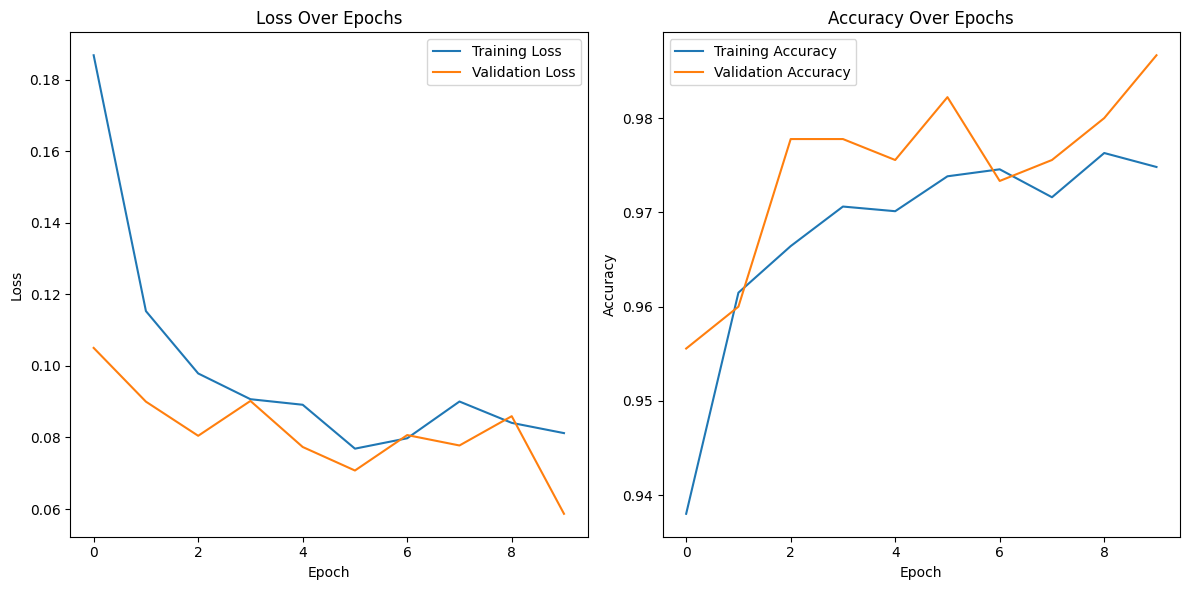

In [28]:
# Plot Learning Curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(final_training_history['loss'], label='Training Loss')
plt.plot(final_training_history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(final_training_history['accuracy'], label='Training Accuracy')
plt.plot(final_training_history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout();

The graphs illustrate the training and validation performance of the neural network model over epochs. The left graph shows a steady decrease in training and validation loss, with the curves converging by the final epoch, indicating effective learning and minimal overfitting. The right graph displays accuracy over epochs, where both training and validation accuracy steadily improve, with validation accuracy slightly fluctuating but remaining consistently higher than training accuracy. This suggests that the model generalizes well to unseen data and effectively captures patterns in the dataset, making it suitable for identifying potential personal loan acceptors.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


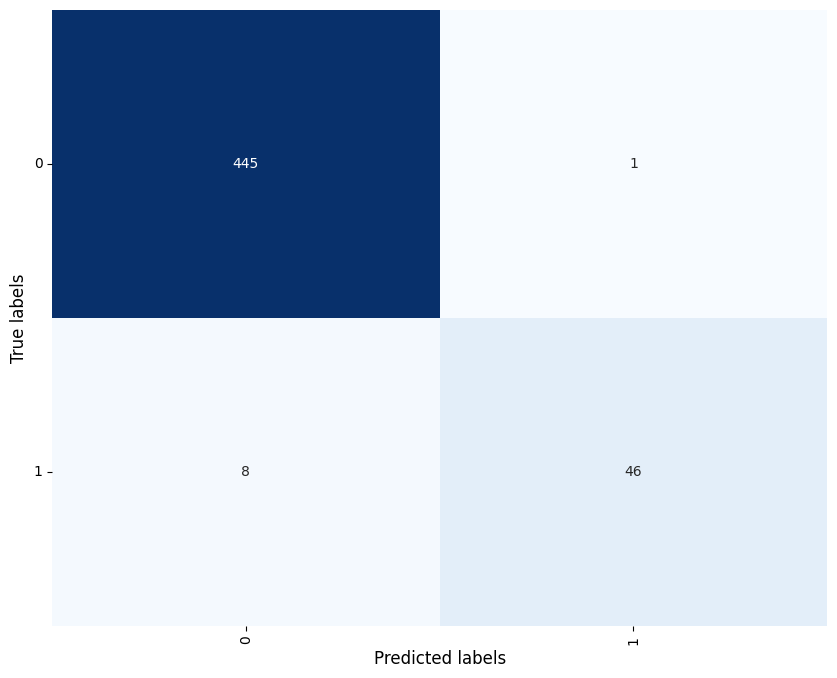

In [29]:
predictions = final_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.xticks(ticks=np.arange(confusion_mtx.shape[1]) + 0.5, labels=np.unique(true_classes), rotation=90)
plt.yticks(ticks=np.arange(confusion_mtx.shape[0]) + 0.5, labels=np.unique(true_classes), rotation=0);

The confusion matrix shows that the model correctly classified 445 instances as non-loan acceptors (true negatives) and 46 as loan acceptors (true positives). It made two false positive errors, predicting loan acceptance when it was not the case, and seven false negative errors, failing to identify loan acceptors. The low number of misclassifications, especially false positives, indicates that the model is highly reliable in predicting non-loan acceptors while maintaining a reasonable accuracy for identifying loan acceptors, supporting its use in targeted marketing strategies.

In [30]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       446
           1       0.98      0.85      0.91        54

    accuracy                           0.98       500
   macro avg       0.98      0.92      0.95       500
weighted avg       0.98      0.98      0.98       500



The classification report highlights the model's strong performance across key metrics. For the majority class (0 - non-loan acceptors), the precision, recall, and F1-score are all high, with recall reaching 1.00, indicating perfect identification of non-loan acceptors. For the minority class (1 - loan acceptors), the precision is 0.98, while recall is slightly lower at 0.85, resulting in an F1-score of 0.91. The model's overall accuracy is 0.98, reflecting its ability to predict correctly for most instances. The macro average F1-score of 0.95 shows balanced performance across both classes, while the weighted average F1-score of 0.98 reflects the model's effectiveness, weighted by class distribution. These metrics suggest the model is highly reliable, particularly in minimizing false positives and capturing most loan acceptors effectively.

## Conclusion

Our analysis demonstrates the effectiveness of leveraging a Sequential neural network model to predict personal loan acceptance. Through a detailed exploration of customer demographics, financial behaviour, and model performance metrics, we identified key factors such as income, credit card spending, education levels, and CD account ownership as significant predictors of loan acceptance. The model achieved an impressive overall accuracy of 98%, with high precision and recall for both loan acceptors and non-acceptors, ensuring reliability in predictions.
This targeted approach enables the bank to focus its marketing efforts on customers most likely to accept personal loans, optimizing resource allocation and enhancing profitability. The minimal false positive rate reduces the risk of misdirected offers, while the robust recall for loan acceptors ensures the bank captures most potential customers. By aligning data-driven insights with strategic objectives, this project provides a scalable and efficient solution to expand the bank’s personal loan portfolio while fostering customer satisfaction and financial growth.